# 🚢 Titanic Dataset – Data Cleaning & Preprocessing
This notebook analyzes the Titanic dataset to predict survival using machine learning.


## 🧠 Problem Statement
Can we predict survival on the Titanic using passenger characteristics?
We approach this as a binary classification problem using a Random Forest model.


## 📁 Load Libraries & Dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission_df = pd.read_csv('gender_submission.csv')

## 🔍 Exploratory Data Analysis (EDA)

# 📂 Save Key Visualizations to Visualizations/ folder

In [23]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create folder if it doesn't exist
os.makedirs("Visualizations", exist_ok=True)

# 1. 📊 Survival Distribution

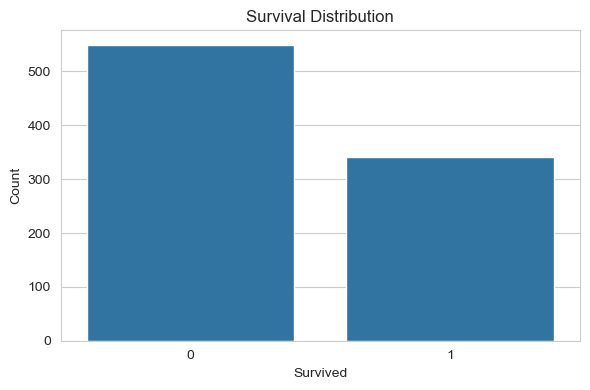

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df)
plt.title("Survival Distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("Visualizations/survival_dist.png")
plt.show()

# 2. 🎂 Age Distribution

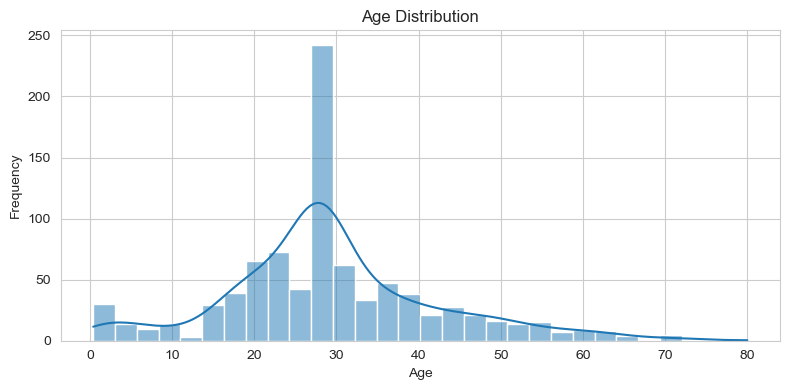

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("Visualizations/age_distribution.png")
plt.show()

## 🧹 Data Cleaning & Feature Engineering

In [26]:
# Fill missing values
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# Encode categorical features
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    if col in train_df.columns:
        train_df[col] = le.fit_transform(train_df[col])
    if col in test_df.columns:
        test_df[col] = le.transform(test_df[col])

# Drop unused columns
train_df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True, errors='ignore')
test_ids = test_df['PassengerId'] if 'PassengerId' in test_df.columns else None
test_df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True, errors='ignore')


## 🤖 Modeling & Evaluation

In [27]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

print(classification_report(y_val, y_pred))
print('Validation Accuracy:', accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Validation Accuracy: 0.8212290502793296


## 📊 Feature Importance

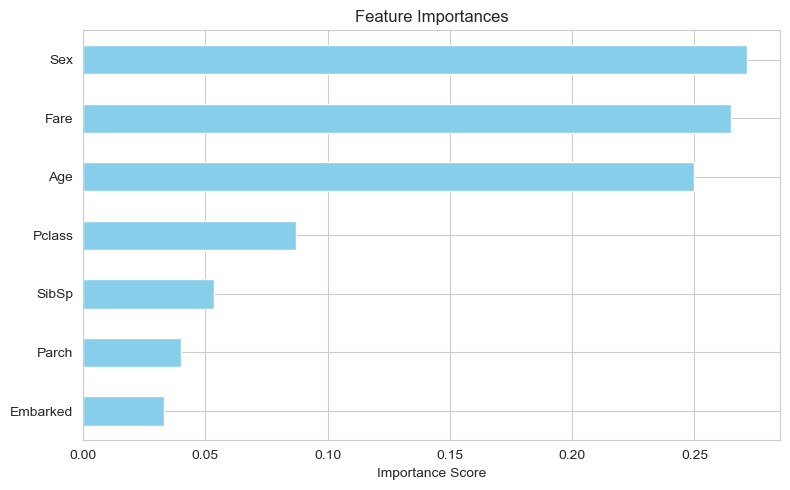

In [32]:
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 5))
importances.sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig("Visualizations/feature_importance.png")
plt.show()

# Fill all missing values in test_df with median or mode

In [30]:
for col in test_df.columns:
    if test_df[col].dtype in ['float64', 'int64']:
        test_df[col] = test_df[col].fillna(test_df[col].median())
    else:
        test_df[col] = test_df[col].fillna(test_df[col].mode()[0])


# Generate Submission

In [31]:
test_predictions = model.predict(test_df)
submission = pd.DataFrame({'PassengerId': test_ids, 'Survived': test_predictions})
submission.to_csv('submission.csv', index=False)

## 📌 Next Steps
- Hyperparameter tuning (GridSearchCV)
- Try gradient boosting (XGBoost, LightGBM)
- Model explainability (SHAP, LIME)
- Streamlit app for interactive demo
